# Question 1 of Assignment 2

## 1. Setting things up

### Creating the nodes for a binary tree

In [2]:
class Node: 
    # Constructor to create a new node 
    def __init__(self, data): 
        self.data = data 
        self.left = None
        self.right = None

### Defining function to split list into nodes

In [73]:
def find_minimum_split(perm):
    
    if len(perm)>1:
        mini= perm.index(min(perm))
        small= Node(min(perm))
        
    
        left= perm[:mini]
        small.left= perm[:mini]
        
        right= perm[mini+1:]
        small.right= perm[mini+1:]
        perm[mini]= small
        
        find_minimum_split(small.left)
        find_minimum_split(small.right)

### Forming the tree and calculating its height

In [151]:
#Due to how it's coded above, we get a list with node, as well as each number when splitted, 
#so to get only the node and hence, get our tree:
def visit(a):
    if isinstance(a, int):
        print(a)
    else:
        if len(a.left)!=0:
            for i in a.left:
                if isinstance(i,Node):
                    a.left=i #Once we get node, make the list the node itself
                    visit(a.left) #Continue along this path
                    break
            
                
        if len(a.right)!=0:
            for i in a.right:
                if isinstance(i,Node):
                    a.right=i
                    visit(a.right)
                    break

def maxDepth(node): 
    if type(node) is list: 
        if node==[]:
            return 0
        else:
            if len(node)==1:
                return 1
    if isinstance(node, int):
    #This occurs only at root
        pass
    else: 

        # Compute the depth of each subtree 
        left_Depth = maxDepth(node.left) 
        right_Depth = maxDepth(node.right) 
  
        # Use the larger one 
        if (left_Depth > right_Depth): 
            return left_Depth+1
        else: 
            return right_Depth+1

##Code for height from here: https://www.geeksforgeeks.org/write-a-c-program-to-find-the-maximum-depth-or-height-of-a-tree/

## 2. Running doubling experiments

### First, getting different sizes for permutation

In [154]:
#sizes = [ i for i in range(1, 100000, 1000)]
sizes = [ (i**2) for i in range(2,100,1)]
print(sizes)

[4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]


### Taking 10 permutations (lesser if length < 10) before plotting average for each size

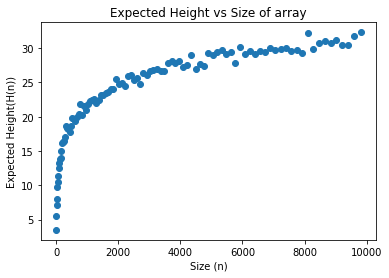

In [155]:
import random
import matplotlib.pyplot as plt

def find_heights(n):
    list_n= list(range(1,n+1)) #So, if n is 10, we get list of length 10
    if n < 11:
        k= n
    else:
        k= 10
    heights=[]
    for i in range(k):
        random.shuffle(list_n)
        list_h= list_n.copy()#otherwise list_n is modified by find_minimum
        
        find_minimum_split(list_h)
        
        visit(list_h[list_n.index(min(list_n))])
        
        height= maxDepth(list_h[list_n.index(min(list_n))])
        heights.append(height)
    average= sum(heights)/len(heights)    
    return [n,average]

averages=[]
for i in sizes:
    averages.append(find_heights(i))
    
plt.plot([x[0] for x in averages],[x[1] for x in averages], 'o')
plt.title("Expected Height vs Size of array")
plt.xlabel("Size (n)")
plt.ylabel("Expected Height(H(n))")
plt.show()


Here, we'll note that strictly speaking, we're only finding the Average height of the tree, which is a point approximate of the Expected Height H(n).
From the graph, we note that initially, H(n) curves upwards sharply, before 'slowing' down, i.e. we can see the growth rate decreasing as n increases. This suggests that H(n) is most likely $\sqrt{n}$ or log n (taking base 2). 
So, this would mean that there would be linear dependency between H(n) and log n, if plotted on a log-log scale:

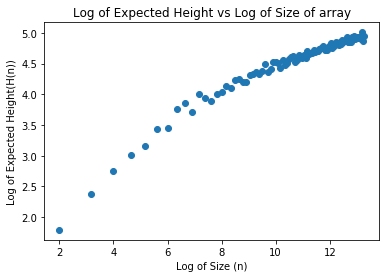

In [156]:
from math import sqrt, log
def find_heights_logged(n):
    list_n= list(range(1,n+1)) #So, if n is 10, we get list of length 10
    if n < 11:
        k= n
    else:
        k= 10
    heights=[]
    for i in range(k):
        random.shuffle(list_n)
        list_h= list_n.copy()#otherwise list_n is modified by find_minimum
        
        find_minimum_split(list_h)
        
        visit(list_h[list_n.index(min(list_n))])
        
        height= maxDepth(list_h[list_n.index(min(list_n))])
        heights.append(log(float(height),2))
    average= sum(heights)/len(heights)    
    return [log(n,2),average]

averages=[]
for i in sizes:
    averages.append(find_heights_logged(i))
    
plt.plot([x[0] for x in averages],[x[1] for x in averages], 'o')
plt.title("Log of Expected Height vs Log of Size of array")
plt.xlabel("Log of Size (n)")
plt.ylabel("Log of Expected Height(H(n))")
plt.show()

And as we can see, we get a linear trend, hence, showing that it's true.

## 3. Finding F(n) for H(n)= Θ(F(n))

If H(n)= Θ(F(n)), then, by definition, lim<sub>n→$\infty$</sub>$\frac{H(n)}{F(n)}$= some constant ,C. In that case, we'll divide T(n) by $\sqrt{n}$ and log n, for every size n, and by judging which is more likely to tend to a constant, based on each plot, we find F(n).

###  If F(n)= $\sqrt{n}$:

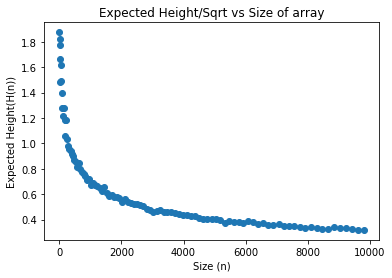

In [157]:
from math import sqrt, log
def find_heights_sqrt(n):
    list_n= list(range(1,n+1)) #So, if n is 10, we get list of length 10
    if n < 11:
        k= n
    else:
        k= 10
    heights=[]
    for i in range(k):
        random.shuffle(list_n)
        list_h= list_n.copy()#otherwise list_n is modified by find_minimum
        
        find_minimum_split(list_h)
        
        visit(list_h[list_n.index(min(list_n))])
        
        height= maxDepth(list_h[list_n.index(min(list_n))])
        heights.append(float(height)/sqrt(n))
    average= sum(heights)/len(heights)    
    return [n,average]

averages=[]
for i in sizes:
    averages.append(find_heights_sqrt(i))
    
plt.plot([x[0] for x in averages],[x[1] for x in averages], 'o')
plt.title("Expected Height/Sqrt vs Size of array")
plt.xlabel("Size (n)")
plt.ylabel("Expected Height(H(n))")
plt.show()

Here, we can clearly see that the points are curving downwards, hence indicating that it is indeed influenced by size. As a result, this means its ratio will be a function of n, not a constant as n→$\infty$.

### If F(n)= log n:

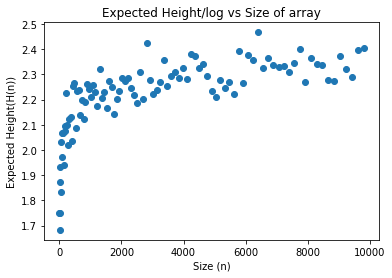

In [158]:
def find_heights_log(n):
    list_n= list(range(1,n+1)) #So, if n is 10, we get list of length 10
    if n < 11:
        k= n
    else:
        k= 10
    heights=[]
    for i in range(k):
        random.shuffle(list_n)
        list_h= list_n.copy()#otherwise list_n is modified by find_minimum
        
        find_minimum_split(list_h)
        
        visit(list_h[list_n.index(min(list_n))])
        
        height= maxDepth(list_h[list_n.index(min(list_n))])
        heights.append(float(height)/log(n,2))
    average= sum(heights)/len(heights)    
    return [n,average]

averages=[]
for i in sizes:
    averages.append(find_heights_log(i))
    
plt.plot([x[0] for x in averages],[x[1] for x in averages], 'o')
plt.title("Expected Height/log vs Size of array")
plt.xlabel("Size (n)")
plt.ylabel("Expected Height(H(n))")
plt.show()

Here, while it may not look linear, we can see that once we disregard the intial few 10 or 20 points, the rest of the points seem to vary between a constant of 2.1 to 2.5. While the variation occurs due to the probabilistic nature of our permuatations for every size, we can see that this variation is not dependent on the size of our array or permutation. As a result, it most likely is tending to a constant as n→$\infty$.

## 4. Conclusion

From our plot of H(n) vs n, we were able to identify 2 functions for H(n) based on its shape: $\sqrt{n}$
and log n (base 2). While the ratio of T(n) to log 𝑛 varied constantly despite the size of A, the ratio did vary with size for our other option- $\sqrt{n}$, with the graph curving downwards as n increased. As a result, we can safely conclude that F(n) is most likely log 𝑛.